In [ ]:
!pip install pandas numpy pandas-datareader matplotlib yfinance


In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
%matplotlib inline

In [ ]:
IBM = yf.download('IBM', start='2016-01-01' , end='2017-12-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
IBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,129.636703,129.990433,128.336517,129.971313,90.350601,5469952
2016-01-05,130.745697,130.869980,128.919693,129.875717,90.284111,4105341
2016-01-06,128.470367,129.617584,127.743790,129.225616,89.832199,4509201
2016-01-07,127.820267,129.082214,126.606117,127.017204,88.296997,7348987
2016-01-08,127.323135,127.934990,125.544930,125.841301,87.479568,4981784


In [ ]:
IBM_close = IBM['Adj Close']
IBM_close.head()

Date
2016-01-04    90.350601
2016-01-05    90.284111
2016-01-06    89.832199
2016-01-07    88.296997
2016-01-08    87.479568
Name: Adj Close, dtype: float64

In [ ]:
daily_returns = IBM_close.pct_change()
daily_returns.head()


Date
2016-01-04         NaN
2016-01-05   -0.000736
2016-01-06   -0.005005
2016-01-07   -0.017090
2016-01-08   -0.009258
Name: Adj Close, dtype: float64

In [ ]:
daily_volatility = daily_returns.std()
daily_volatility

0.011241032875609718

In [ ]:
print(str(round(daily_volatility, 5) * 100) + '%')

1.124%


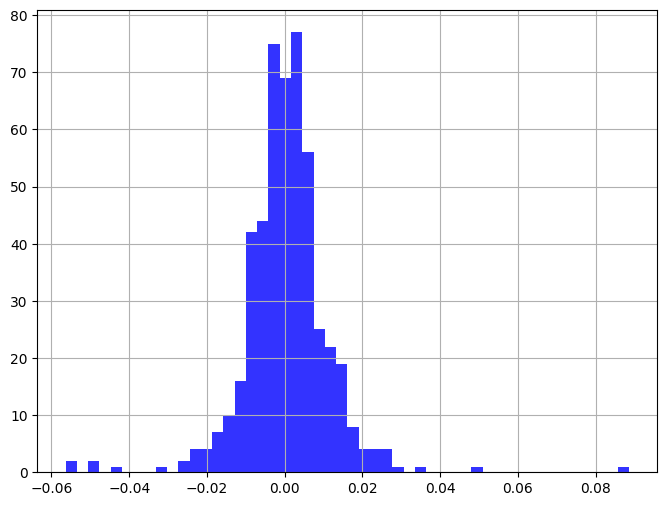

In [ ]:
daily_returns.hist(bins=50, alpha=0.8, color='blue', figsize=(8,6));

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


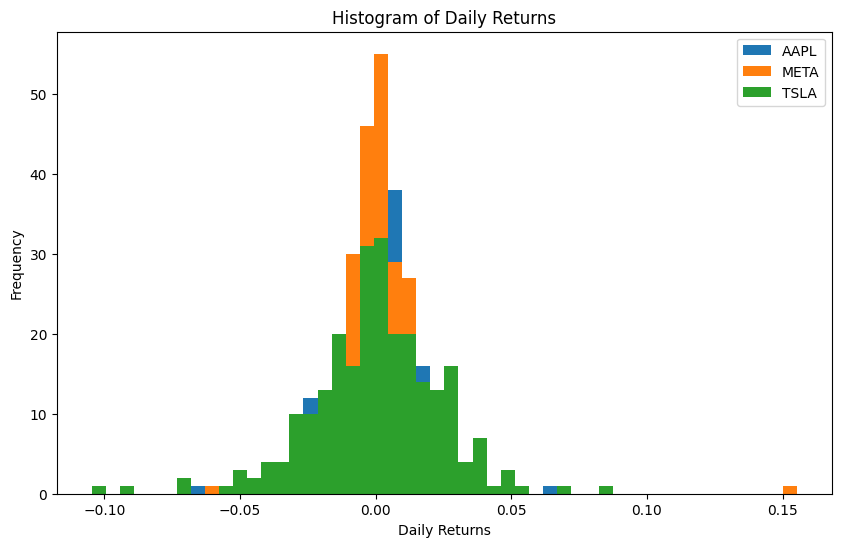

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

start = datetime(2016, 1, 1)
end = datetime(2017, 1, 1)

assets = ['AAPL', 'META', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    data = yf.download(stock, start=start, end=end)
    df[stock] = data['Adj Close']

asset_returns_daily = df.pct_change()

asset_volatility_daily = asset_returns_daily.std()

average_volatility = asset_volatility_daily.mean()

asset_returns_daily.plot.hist(bins=50, figsize=(10, 6))
plt.xlabel('Daily Returns')
plt.title('Histogram of Daily Returns')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


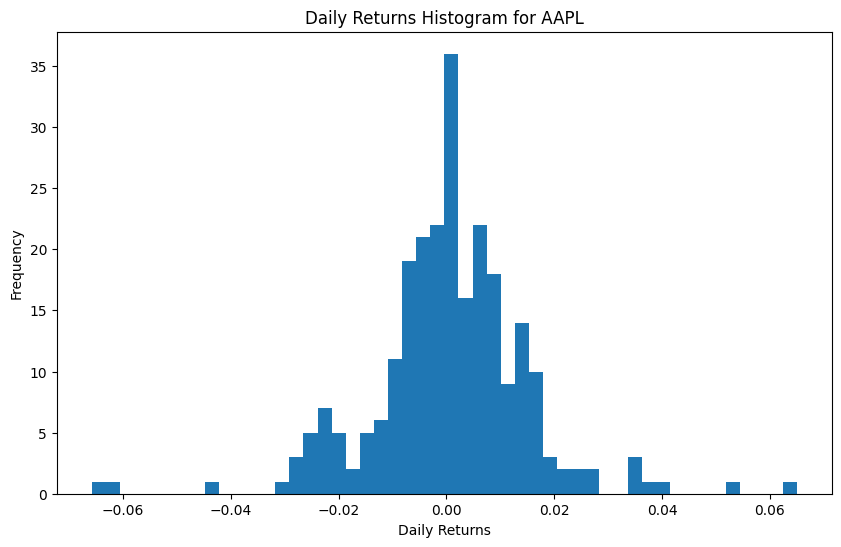

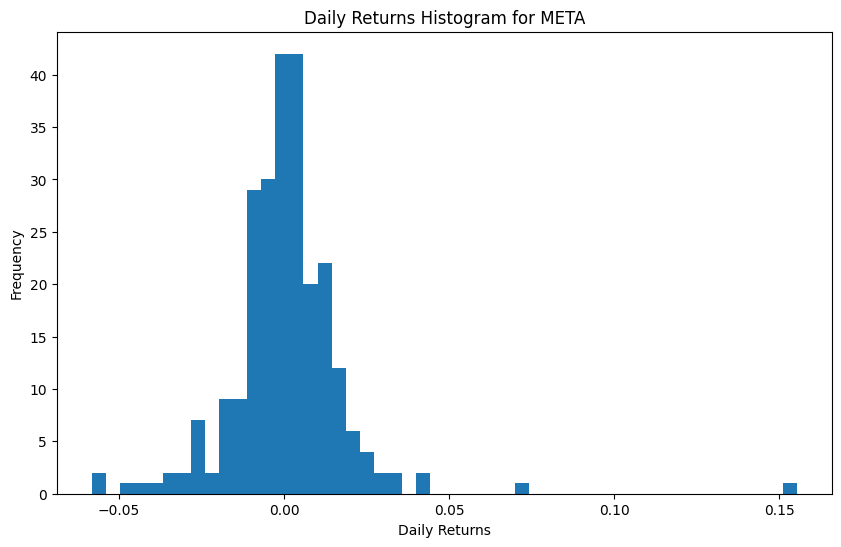

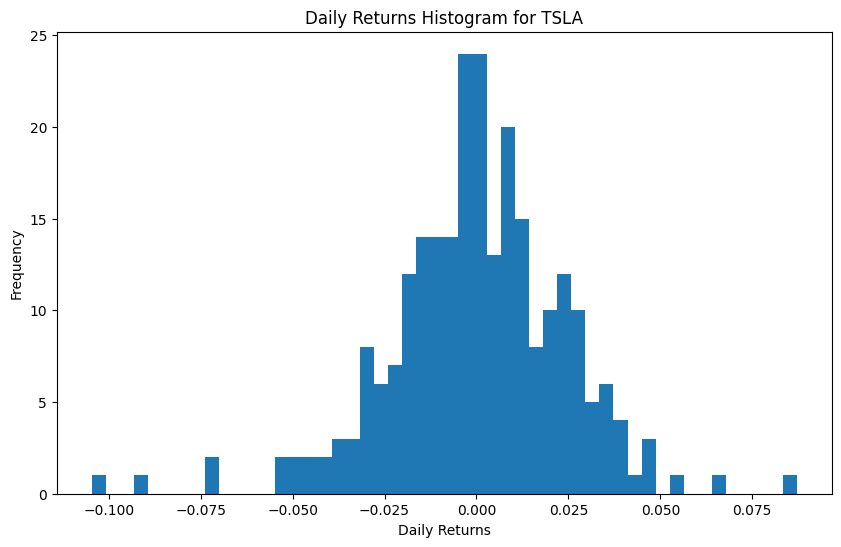

Average Volatility for Each Stock:
AAPL    0.014731
META    0.017840
TSLA    0.024073
dtype: float64


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

start = datetime(2016, 1, 1)
end = datetime(2017, 1, 1)

assets = ['AAPL', 'META', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    data = yf.download(stock, start=start, end=end)
    df[stock] = data['Adj Close']

asset_returns_daily = df.pct_change()

asset_volatility_daily = asset_returns_daily.std()

for stock in assets:
    plt.figure(figsize=(10, 6))
    asset_returns_daily[stock].plot.hist(bins=50)
    plt.title(f'Daily Returns Histogram for {stock}')
    plt.xlabel('Daily Returns')
    plt.show()

print("Average Volatility for Each Stock:")
print(asset_volatility_daily)
